In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

marathon = pd.read_csv("../course-files/marathon_results_2017.csv", usecols=["Age","M/F","Country","40K"])
marathon = marathon[marathon['40K'] != '-']
marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.Timedelta(x).total_seconds())
marathon.head(5)

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,2:02:53,7373.0
1,30,M,USA,2:03:14,7394.0
2,25,M,JPN,2:03:38,7418.0
3,32,M,USA,2:04:35,7475.0
4,31,M,KEN,2:05:00,7500.0


<Axes: xlabel='Age', ylabel='TimeSeconds'>

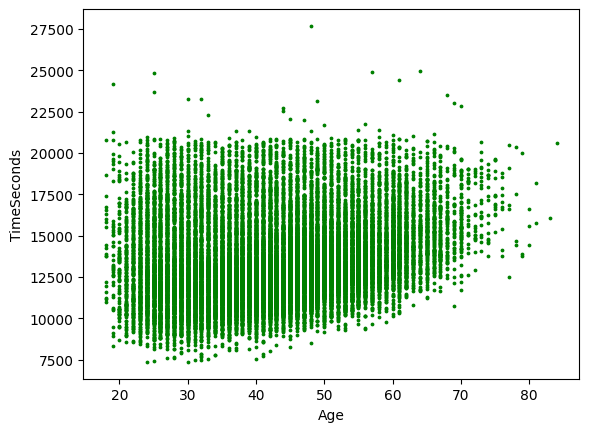

In [6]:
marathon.plot.scatter(y='TimeSeconds', x='Age', c='green', s=3)

In [8]:
marathon_m = marathon[marathon['M/F'] == 'M']
marathon_f = marathon[marathon['M/F'] == 'F']

<Axes: xlabel='Age', ylabel='TimeSeconds'>

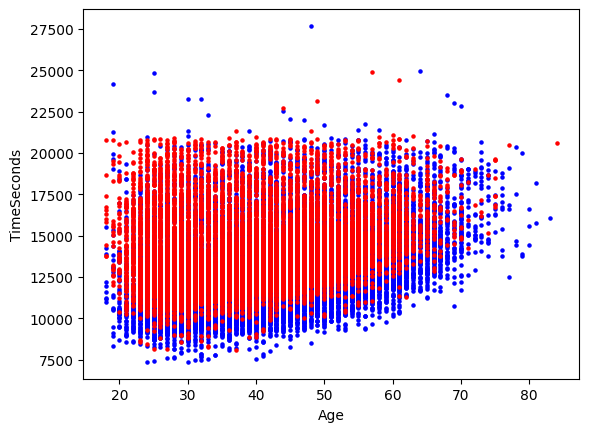

In [9]:
ax1 = marathon_m.plot(kind='scatter', x='Age', y='TimeSeconds', c='blue', s=5)
marathon_f.plot.scatter(x='Age', y='TimeSeconds', c='red', s=5, ax=ax1)

<Axes: xlabel='Age', ylabel='TimeSeconds'>

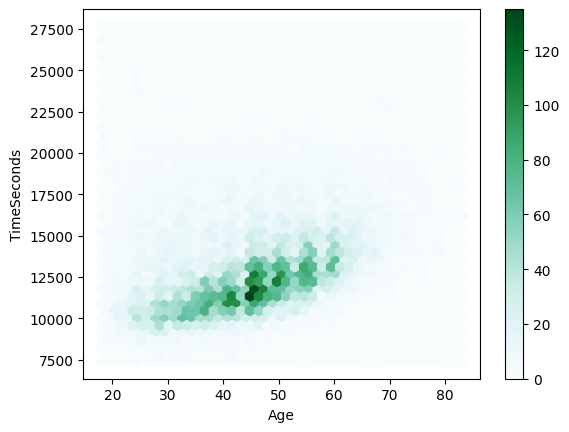

In [21]:
marathon_m.plot(kind='hexbin', x='Age', y='TimeSeconds', gridsize=40)

<Axes: xlabel='Age', ylabel='TimeSeconds'>

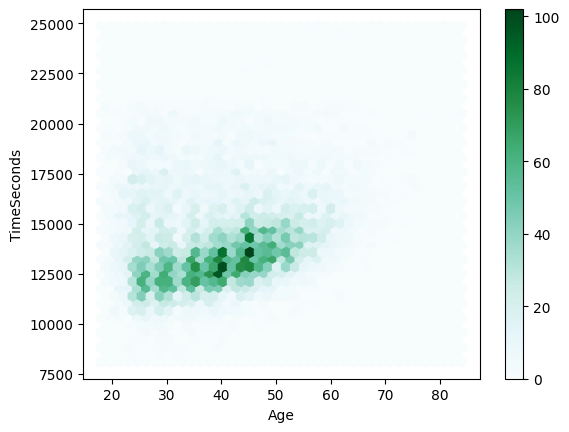

In [25]:
marathon_f.plot(kind='hexbin', x='Age', y='TimeSeconds', gridsize=40)

In [38]:
#Import data
nasa = pd.read_csv(r'../COURSE-FILES/nasa_facebook_statuses.csv', usecols=["status_published","num_likes"])
#Convert column type to date time
nasa["status_published"] = pd.to_datetime(nasa["status_published"])
#Select observations between two datetimes - May 2015
filter =(nasa['status_published'] >= '2016-5-1') & (nasa['status_published'] < '2016-6-1')
nasa = nasa[filter]
#Add column with day only
nasa['day'] = nasa.apply(lambda row: row["status_published"].day,axis=1)
#Group all columns by sum
nasa_by_day = nasa.drop(columns='status_published').groupby(by='day').sum()
#Import data
bean = pd.read_csv("../course-files/mrbean_facebook_statuses.csv", usecols=["status_published","num_likes"])
#Convert column type to date time
bean["status_published"] = pd.to_datetime(bean["status_published"])
#Select observations between two datetimes - May 2015
filter =(bean['status_published'] >= '2016-5-1') & (bean['status_published'] < '2016-6-1')
bean = bean[filter]
#Add column with day only
bean['day'] = bean.apply(lambda row: row["status_published"].day,axis=1)
#Group all columns by sum
bean_by_day = bean.drop(columns='status_published').groupby(by='day').sum()
days = pd.concat([nasa.day, bean.day])
days = days.unique()
fb = pd.DataFrame(index=days).sort_index()
fb['nasa'] = nasa_by_day["num_likes"]
fb['bean'] = bean_by_day["num_likes"]
fb.fillna(value=0, inplace=True)
fb.head()

,nasa,bean
1,60243,0.0
2,177989,0.0
3,50264,0.0
4,133302,26821.0
5,89657,0.0


<Axes: >

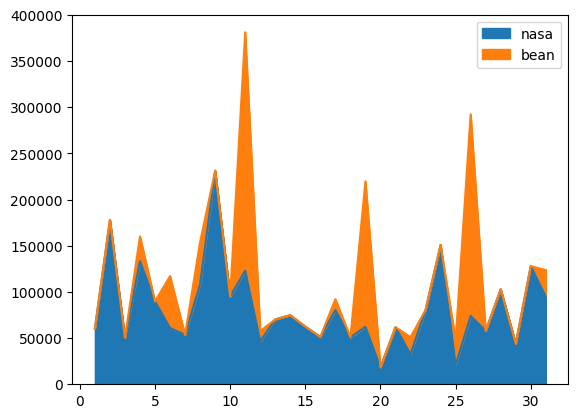

In [40]:
fb.plot(kind='area')